In [11]:
import sys
import sys
sys.path.append('C:\\Users\\alexw\\Documents\\Git\\AI-WORK\\Advanced-Trading')

from simple_heuritic_tradings.utils.utils_df import *
PATH = r"C:\Users\alexw\Documents\Git\AI-WORK\Advanced-Trading\simple_heuritic_tradings\Data\ETHUSDT-5m.zip"
dataframe = opener_dataframe(PATH)

The data frame does not contain the close price, created thanks to open price


<Axes: >

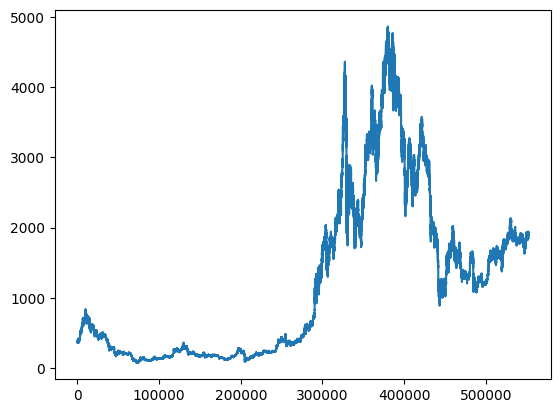

In [13]:
dataframe["open_price"].plot()

In [16]:
import plotly.express as px

# Assuming you have a DataFrame named 'dataframe' with 'open_price' and 'open_time' columns

fig = px.line(dataframe[300000:350000], x='open_date', y='open_price', title='Open Prices Over Time')
fig.show()


In [19]:
window_size = 16
import tqdm as tqdm
from scipy import signal
import random
b, a = signal.butter(8, 0.125)
random_index = random.randint(window_size + 1, len(dataframe) - window_size - 1)
i = random_index
price_signal = dataframe["open_price"].iloc[i - window_size:i].values
price_new_signal = signal.filtfilt(b, a, price_signal, padlen=window_size-1)

In [25]:
print(len(price_signal))
print(len(price_new_signal))
print(len(range(random_index, random_index + window_size)))

16
16
16


In [31]:
import plotly.graph_objects as go
# Create a figure to compare the signals
fig = go.Figure()
X = list(range(random_index, random_index + window_size))
fig.add_trace(go.Scatter(x=X,
                         y=price_signal,
                         mode='lines',
                         name='Original Signal'))

fig.add_trace(go.Scatter(x=X,
                         y=price_new_signal,
                         mode='lines',
                         name='Filtered Signal'))

fig.update_layout(title=f'Comparison of Original and Filtered Signals (Index {random_index})',
                  xaxis_title='Time Index',
                  yaxis_title='Price',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

fig.show()